# 각 활성화 함수에 적합한 초깃값 설정 비교 

(p.207) <br/>

<b>Xavier</b> 초깃값은 활성화 함수<sup>activation function</sup>가 선형인 것을 전제로 이끈 결과 
> sigmoid와 tanh함수는 좌우 대칭이라 중앙 부근이 선형 함수임  <br/>

그래서, sigmoid 또는 tanh 함수를 사용할 때는 Xavier 초깃값이 적당함 

ReLU 함수를 사용할 때는 <b>He 초깃값</b>이 적당함  <br/>
> 아래 세가지 실험들은 ReLU 함수를 사용했을 때, 각 초깃값에 따른 활성화값의 분포를 나타냄 

### ★ 어떤게 좋냐 ?
앞 실험에서 보았듯 활성화값이 고르게 분포된 것이 좋은것 (p.206)

# std=0.01인 정규분포를 따르는 초깃값

In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
                                          # 데이터의 노드 개수는 100개 
    
node_num           = 100       # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size  = 5         # 은닉층이 5개 
activations        = {}        # <dict>객체: 이곳에 활성화 결과(활성화값)를 저장 

x = input_data 

In [2]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！ 
    # 초기값은 가우스 분포에 따라 무작위로 선택 

    w = np.random.randn(node_num, node_num) * 0.01                      # 표준편차를 0.01로 한 정규분포 
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)    # for Xavier 초깃값
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  #  for He 초깃값 


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

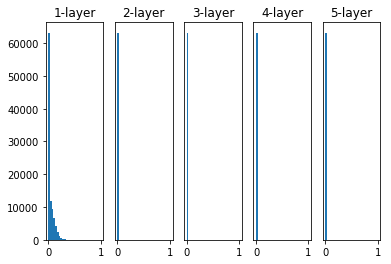

In [3]:
for i, a in activations.items():           # <dict>.items() : key와 value를 반환 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


표준편차가 0.01인 정규분포를 가중치 초깃값으로 사용한 경우 

# Xavier 초깃값

In [4]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
                                          # 데이터의 노드 개수는 100개 
    
node_num           = 100       # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size  = 5         # 은닉층이 5개 
activations        = {}        # <dict>객체: 이곳에 활성화 결과(활성화값)를 저장 

x = input_data 

In [5]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！ 
    # 초기값은 가우스 분포에 따라 무작위로 선택 

    #w = np.random.randn(node_num, node_num) * 0.01                      # 표준편차를 0.01로 한 정규분포 
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)    # for Xavier 초깃값
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  #  for He 초깃값 


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

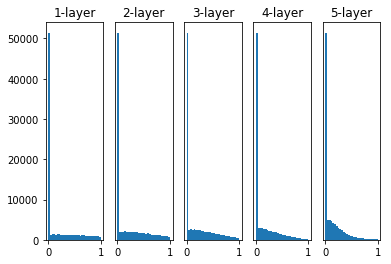

In [6]:
for i, a in activations.items():           # <dict>.items() : key와 value를 반환 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier 초깃값을 사용한 경우 

# He 초깃값

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
                                          # 데이터의 노드 개수는 100개 
    
node_num           = 100       # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size  = 5         # 은닉층이 5개 
activations        = {}        # <dict>객체: 이곳에 활성화 결과(활성화값)를 저장 

x = input_data 

In [8]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！ 
    # 초기값은 가우스 분포에 따라 무작위로 선택 

    #w = np.random.randn(node_num, node_num) * 0.01                      # 표준편차를 0.01로 한 정규분포 
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)    # for Xavier 초깃값
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  #  for He 초깃값 


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

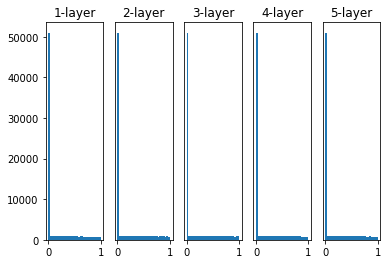

In [9]:
for i, a in activations.items():           # <dict>.items() : key와 value를 반환 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

He 초깃값을 사용한 경우 